In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def plot_dynamic_result(dir_path):
    flag = True
    ## Plotting number of fraud over time
    for root,_,files in os.walk(dir_path):
        for file in files:
            if file.endswith(".csv"):
                # print(file)
                df = pd.read_csv(f"{root}/{file}")
                if flag:
                    fig, ax1 = plt.subplots(figsize=(12,6))
                    df["Fraud_Count"] = df.apply(lambda x:x["TP"]+x["FN"],axis=1)
                    flag = False
                    sns.barplot(data = df, x="Unnamed: 0", y='Fraud_Count', alpha=0.5, ax=ax1,color='b')
                    ax2 = ax1.twinx()
                sns.lineplot(data = df,x="Unnamed: 0",y="F-1", marker='o', sort = False, ax=ax2,label=file)
                TP = df["TP"].sum()
                FP = df["FP"].sum()
                FN = df["FN"].sum()
                recall_t = TP/(TP+FN)
                precision_t = TP/(TP+FP)
                if (precision_t+recall_t)==0:
                    f1=0
                else:
                    f1=(2*precision_t*recall_t)/(precision_t+recall_t)
                print(f"Total metric in {file}    Precision:{precision_t:.2f} ** Recall:{recall_t:.2f} **F1:{f1:.2f}")
    plt.show()

## Normal

Total metric in DecisionTreeClassifier.csv    Precision:0.51 ** Recall:0.68 **F1:0.58
Total metric in AdaBoostClassifier.csv    Precision:0.81 ** Recall:0.58 **F1:0.68
Total metric in RandomForestClassifier.csv    Precision:0.89 ** Recall:0.70 **F1:0.79


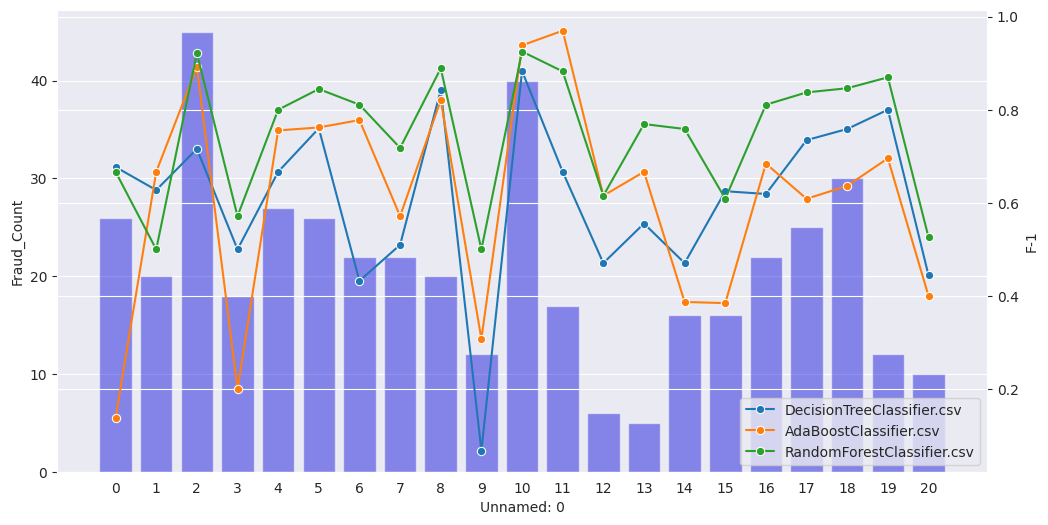

In [4]:
plot_dynamic_result("../../data/results/normal")

Total metric in RandomForestClassifier.csv    Precision:0.88 ** Recall:0.74 **F1:0.81
Total metric in AdaBoostClassifier.csv    Precision:0.75 ** Recall:0.62 **F1:0.68
Total metric in DecisionTreeClassifier.csv    Precision:0.42 ** Recall:0.61 **F1:0.50


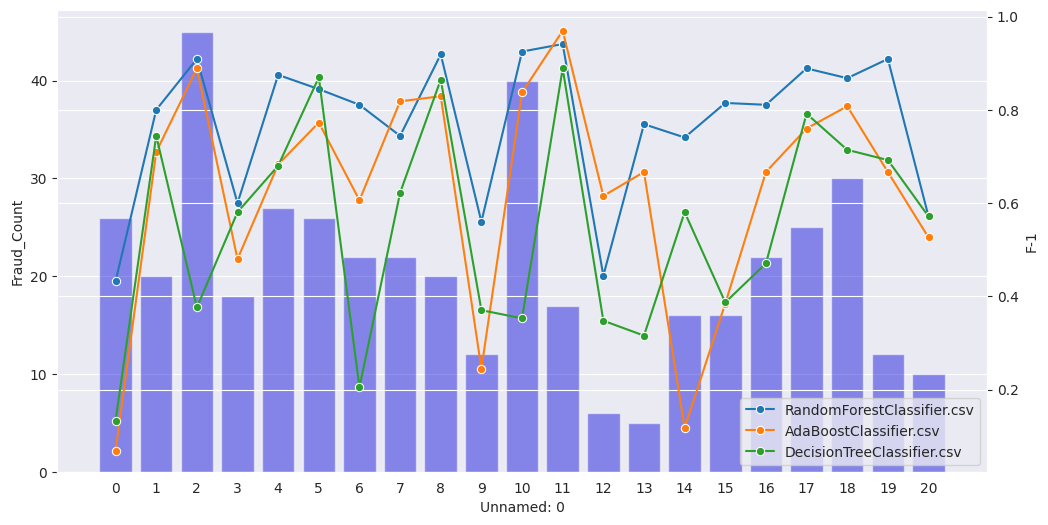

In [5]:
plot_dynamic_result("../../data/results/50_L2")

Total metric in DecisionTreeClassifier.csv    Precision:0.64 ** Recall:0.68 **F1:0.66
Total metric in AdaBoostClassifier.csv    Precision:0.76 ** Recall:0.69 **F1:0.72
Total metric in RandomForestClassifier.csv    Precision:0.87 ** Recall:0.77 **F1:0.82


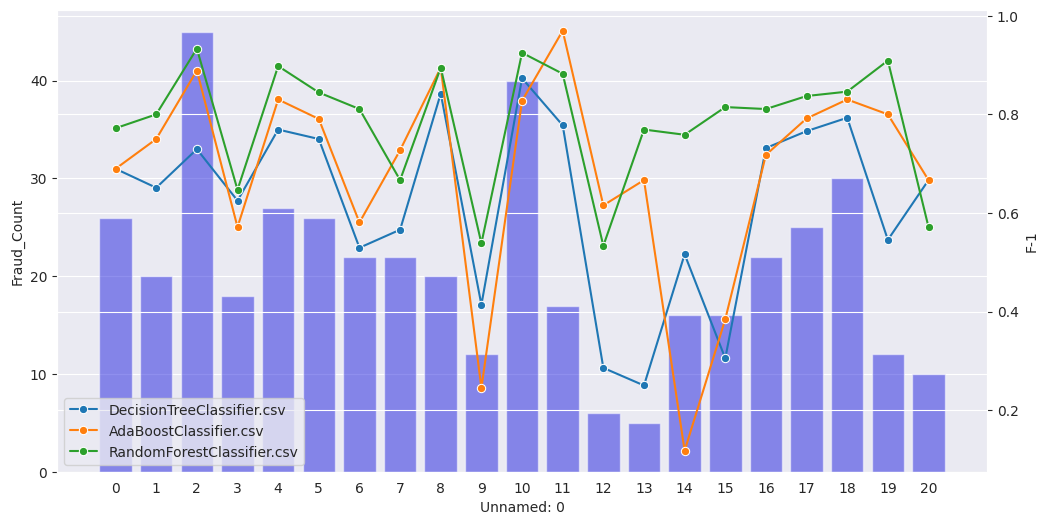

In [6]:
plot_dynamic_result("../../data/results/100_L2")

Total metric in DecisionTreeClassifier.csv    Precision:0.43 ** Recall:0.62 **F1:0.51
Total metric in RandomForestClassifier.csv    Precision:0.90 ** Recall:0.71 **F1:0.79
Total metric in AdaBoostClassifier.csv    Precision:0.81 ** Recall:0.59 **F1:0.68


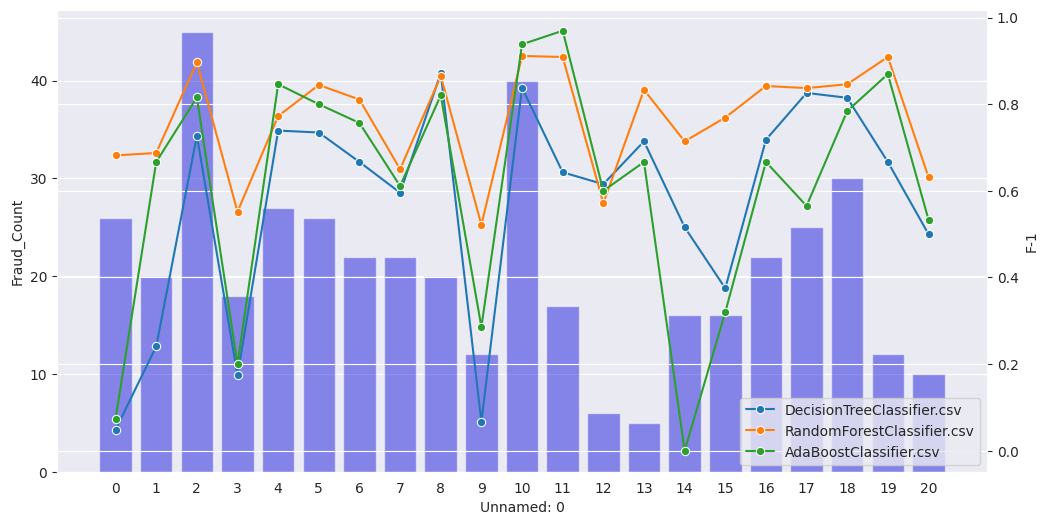

In [7]:
plot_dynamic_result("../../data/results/100_IP")


Total metric in DecisionTreeClassifier.csv    Precision:0.60 ** Recall:0.69 **F1:0.64
Total metric in AdaBoostClassifier.csv    Precision:0.81 ** Recall:0.59 **F1:0.68
Total metric in RandomForestClassifier.csv    Precision:0.90 ** Recall:0.70 **F1:0.79


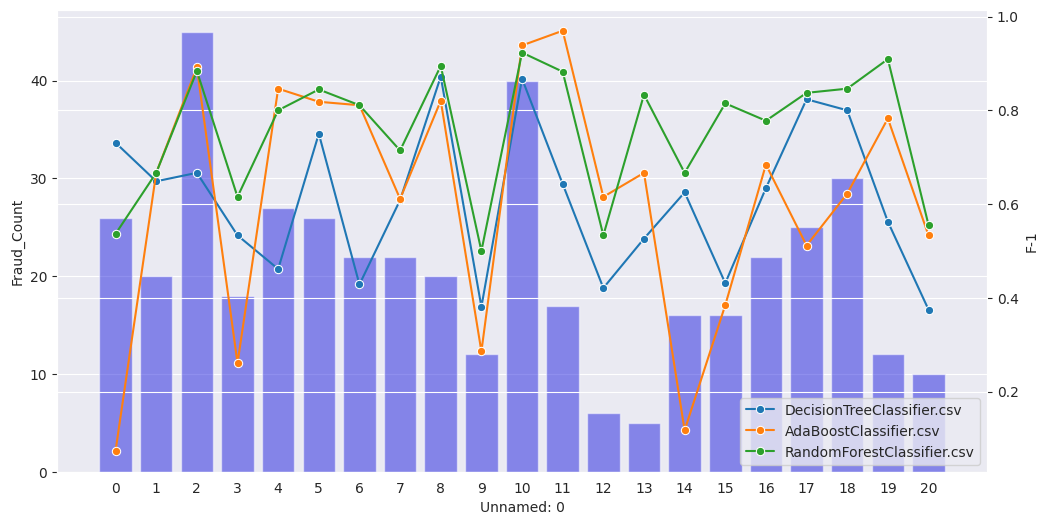

In [8]:
plot_dynamic_result("../../data/results/100_L2_7.8")
